In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import Sequential, layers, models

In [3]:
raw_data = pd.read_csv('train.csv')
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
raw_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kassem, Mr. Fared",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
raw_data = raw_data.fillna(30)

In [6]:
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,30,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,30,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,30,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,30,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,30,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


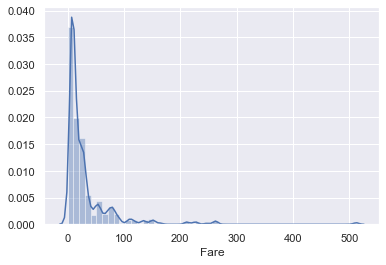

In [7]:
sns.distplot(raw_data['Fare'])

In [8]:
data = raw_data.drop(['Name', 'Ticket', 'Embarked', 'Cabin', 'PassengerId'], axis = 1)

In [9]:
data.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.836071,NaN,13.002570,1.102743,0.806057,49.693429
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000


In [10]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [11]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,30.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [12]:
scaler = StandardScaler()
scale_data = data[['Age', 'Fare']]
scale_data
data = data.drop(['Age', 'Fare'], axis = 1)
data

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,0,1,0
1,1,1,1,1,0
2,1,3,1,0,0
3,1,1,1,1,0
4,0,3,0,0,0
...,...,...,...,...,...
886,0,2,0,0,0
887,1,1,1,0,0
888,0,3,1,1,2
889,1,1,0,0,0


In [13]:
scaler.fit(scale_data)
scale_data = scaler.transform(scale_data)
len(scale_data)

891

In [14]:
scale_data

array([[-0.59705478, -0.50244517],
       [ 0.63416229,  0.78684529],
       [-0.28925051, -0.48885426],
       ...,
       [ 0.01855376, -0.17626324],
       [-0.28925051, -0.04438104],
       [ 0.17245589, -0.49237783]])

In [15]:
data = pd.concat([data, pd.DataFrame(scale_data)], axis = 1)


In [16]:
data

,Survived,Pclass,Sex,SibSp,Parch,0,1
0,0,3,0,1,0,-0.597055,-0.502445
1,1,1,1,1,0,0.634162,0.786845
2,1,3,1,0,0,-0.289251,-0.488854
3,1,1,1,1,0,0.403309,0.420730
4,0,3,0,0,0,0.403309,-0.486337
...,...,...,...,...,...,...,...
886,0,2,0,0,0,-0.212299,-0.386671
887,1,1,1,0,0,-0.827908,-0.044381
888,0,3,1,1,2,0.018554,-0.176263
889,1,1,0,0,0,-0.289251,-0.044381


In [17]:
data.columns.values

array(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 0, 1], dtype=object)

In [18]:
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 0, 1, 'Survived']

In [19]:
data = data[columns]

In [20]:
data.columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Age_Scaled', 'Fare_Scaled', 'Survived']
data

,Pclass,Sex,SibSp,Parch,Age_Scaled,Fare_Scaled,Survived
0,3,0,1,0,-0.597055,-0.502445,0
1,1,1,1,0,0.634162,0.786845,1
2,3,1,0,0,-0.289251,-0.488854,1
3,1,1,1,0,0.403309,0.420730,1
4,3,0,0,0,0.403309,-0.486337,0
...,...,...,...,...,...,...,...
886,2,0,0,0,-0.212299,-0.386671,0
887,1,1,0,0,-0.827908,-0.044381,1
888,3,1,1,2,0.018554,-0.176263,0
889,1,0,0,0,-0.289251,-0.044381,1


In [21]:
y = data['Survived']
x1 = data.drop(['Survived'], axis = 1)

In [22]:
np.savez('Titanic_Train_Data', inputs = x1, targets = y)

In [23]:
#x = sm.add_constant(x1)

In [108]:
#x

,const,Pclass,Sex,SibSp,Parch,Age_Scaled,Fare_Scaled
0,1.0,3,0,1,0,-0.597055,-0.502445
1,1.0,1,1,1,0,0.634162,0.786845
2,1.0,3,1,0,0,-0.289251,-0.488854
3,1.0,1,1,1,0,0.403309,0.420730
4,1.0,3,0,0,0,0.403309,-0.486337
...,...,...,...,...,...,...,...
886,1.0,2,0,0,0,-0.212299,-0.386671
887,1.0,1,1,0,0,-0.827908,-0.044381
888,1.0,3,1,1,2,0.018554,-0.176263
889,1.0,1,0,0,0,-0.289251,-0.044381


In [87]:
#reg_log = sm.Logit(y, x)

In [88]:
#results = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.442572
         Iterations 6


In [89]:
#results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Fri, 08 May 2020   Pseudo R-squ.:                  0.3354
Time:                        15:37:54   Log-Likelihood:                -394.33
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.557e-83
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1090      0.308      3.604      0.000       0.506       1.712
Pclass         -1.0836      0.139     -7.792      0.000      -1.356      -0.811
Sex             2.7633      0.199     13.883      0.000       2.373       3.153
SibSp          -0.3510      0.110     -3.201      0.001      -0.566      -0.136
Parch          -0.1129      0.117     -0.961      0.336      -0.343       0.117
Age_Scaled     -0.5163      0.101     -5.097      0.000      -0.715      -0.318
Fare_Scaled     0.1417      0.117      1.208      0.227      -0.088       0.372
===============================================================================
"""

In [105]:
#cm_df = pd.DataFrame(results.pred_table())
#cm_df.columns = ['Predicted 0', 'Predicted 1']
#cm_df = cm_df.rename(index={0: 'Actual 0', 1:'Actual 1'})

#cm_df

,Predicted 0,Predicted 1
Actual 0,467.0,82.0
Actual 1,100.0,242.0


In [106]:
#cm = np.array(cm_df)
#accuracy_train = (cm[0, 0] + cm[1, 1]) / cm.sum()
#accuracy_train

0.7957351290684624

In [24]:
test_data = pd.read_csv('test.csv')

test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [25]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [26]:
output = pd.DataFrame(test_data['PassengerId'])
output

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [27]:
test_data = test_data.fillna(30)

In [28]:
test = test_data.drop(['Name', 'Ticket', 'Embarked', 'Cabin', 'PassengerId'], axis = 1)

In [29]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,30.0,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,30.0,0,0,8.0500


In [30]:
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,0,30.0,0,0,8.0500
414,1,1,39.0,0,0,108.9000
415,3,0,38.5,0,0,7.2500
416,3,0,30.0,0,0,8.0500


In [31]:
scaler_test = StandardScaler()
scale_test = test[['Age', 'Fare']]

test = test.drop(['Age', 'Fare'], axis = 1)
test

,Pclass,Sex,SibSp,Parch
0,3,0,0,0
1,3,1,1,0
2,2,0,0,0
3,3,0,0,0
4,3,1,1,1
...,...,...,...,...
413,3,0,0,0
414,1,1,0,0
415,3,0,0,0
416,3,0,0,0


In [32]:
scaler_test.fit(scale_test)
scale_test = scaler_test.transform(scale_test)
len(scale_test)

418

In [33]:
test = pd.concat([test, pd.DataFrame(scale_test)], axis = 1)
test

,Pclass,Sex,SibSp,Parch,0,1
0,3,0,0,0,0.339424,-0.498160
1,3,1,1,0,1.329924,-0.513027
2,2,0,0,0,2.518523,-0.464841
3,3,0,0,0,-0.254876,-0.483219
4,3,1,1,1,-0.651076,-0.418225
...,...,...,...,...,...,...
413,3,0,0,0,-0.017156,-0.494201
414,1,1,0,0,0.696004,1.313978
415,3,0,0,0,0.656384,-0.508544
416,3,0,0,0,-0.017156,-0.494201


In [34]:
test.columns.values

array(['Pclass', 'Sex', 'SibSp', 'Parch', 0, 1], dtype=object)

In [35]:
test.columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Age_Scaled', 'Fare_Scaled']

test

,Pclass,Sex,SibSp,Parch,Age_Scaled,Fare_Scaled
0,3,0,0,0,0.339424,-0.498160
1,3,1,1,0,1.329924,-0.513027
2,2,0,0,0,2.518523,-0.464841
3,3,0,0,0,-0.254876,-0.483219
4,3,1,1,1,-0.651076,-0.418225
...,...,...,...,...,...,...
413,3,0,0,0,-0.017156,-0.494201
414,1,1,0,0,0.696004,1.313978
415,3,0,0,0,0.656384,-0.508544
416,3,0,0,0,-0.017156,-0.494201


In [36]:
np.savez('Titanic_Test_Data', inputs = test)

In [109]:
#test = sm.add_constant(test)

In [110]:
#test

,const,Pclass,Sex,SibSp,Parch,Age_Scaled,Fare_Scaled
0,1.0,3,0,0,0,0.339424,-0.498160
1,1.0,3,1,1,0,1.329924,-0.513027
2,1.0,2,0,0,0,2.518523,-0.464841
3,1.0,3,0,0,0,-0.254876,-0.483219
4,1.0,3,1,1,1,-0.651076,-0.418225
...,...,...,...,...,...,...,...
413,1.0,3,0,0,0,-0.017156,-0.494201
414,1.0,1,1,0,0,0.696004,1.313978
415,1.0,3,0,0,0,0.656384,-0.508544
416,1.0,3,0,0,0,-0.017156,-0.494201


In [111]:
#predictions = results.predict(test)

In [114]:
#predictions.round(0).sum()

161.0

In [121]:
#output = pd.concat([output, pd.DataFrame(predictions.round(0))], axis = 1)


In [122]:
#output

,PassengerId,0
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [128]:
#output.columns = ['PassengerId', 'Survived']
#output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [124]:
#output['Survived'] = output['Survived'].astype(int)

In [125]:
#output

,PassengetId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [129]:
#output.to_csv('Titanic_Logistic_Regression.csv', index = False)

In [37]:
npz = np.load('Titanic_Train_Data.npz')

In [38]:
inputs = npz['inputs']
targets = npz['targets']

print(targets.sum())
print(targets.shape)
print(len(targets))

342
(891,)
891


In [303]:
inputs

array([[ 3.        ,  0.        ,  1.        ,  0.        , -0.59705478,
        -0.50244517],
       [ 1.        ,  1.        ,  1.        ,  0.        ,  0.63416229,
         0.78684529],
       [ 3.        ,  1.        ,  0.        ,  0.        , -0.28925051,
        -0.48885426],
       ...,
       [ 3.        ,  1.        ,  1.        ,  2.        ,  0.01855376,
        -0.17626324],
       [ 1.        ,  0.        ,  0.        ,  0.        , -0.28925051,
        -0.04438104],
       [ 3.        ,  0.        ,  0.        ,  0.        ,  0.17245589,
        -0.49237783]])

In [39]:
counter = 0

index = []

for i in range(len(targets)):
    if targets[i] == 0:
        counter += 1
        
        if counter > int(targets.sum()):
            index.append(i)
    
print(counter)
print(index)



549
[563, 564, 565, 566, 567, 568, 574, 575, 578, 582, 583, 584, 586, 588, 589, 590, 592, 593, 594, 595, 597, 598, 601, 602, 603, 605, 606, 610, 611, 613, 614, 616, 617, 619, 620, 623, 624, 625, 626, 628, 629, 631, 633, 634, 636, 637, 638, 639, 640, 642, 646, 648, 650, 652, 654, 655, 656, 657, 658, 659, 661, 662, 663, 665, 666, 667, 668, 671, 672, 674, 675, 676, 678, 680, 682, 683, 684, 685, 686, 687, 688, 693, 694, 695, 696, 698, 699, 702, 703, 704, 705, 711, 713, 714, 715, 718, 719, 721, 722, 723, 725, 728, 729, 731, 732, 733, 734, 735, 736, 738, 739, 741, 743, 745, 746, 748, 749, 752, 753, 756, 757, 758, 760, 761, 764, 766, 767, 768, 769, 770, 771, 772, 773, 775, 776, 778, 782, 783, 784, 785, 787, 789, 790, 791, 792, 793, 794, 795, 798, 799, 800, 805, 806, 807, 808, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 822, 824, 825, 826, 832, 833, 834, 836, 837, 840, 841, 843, 844, 845, 846, 847, 848, 850, 851, 852, 854, 859, 860, 861, 863, 864, 867, 868, 870, 872, 873, 876, 877, 878, 

In [40]:
balanced_inputs = np.delete(inputs, index, axis = 0)
balanced_targets = np.delete(targets, index, axis = 0)

print(balanced_inputs.shape)
print(balanced_targets.shape)



(684, 6)
(684,)


In [41]:
from sklearn.svm import SVR

In [43]:
def output_file(model, test_data, file_name, output):
    predictions = model.predict(test_data)
    output = pd.concat([output, pd.DataFrame(predictions.round(0))], axis = 1)
    output.columns = ['PassengerId', 'Survived']
    output['Survived'] = output['Survived'].astype(int)
    output.to_csv(file_name, index = False)


In [306]:
balanced_targets

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [48]:
shuffled_indices = np.arange(balanced_targets.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = balanced_inputs[shuffled_indices]
shuffled_targets = balanced_targets[shuffled_indices]

In [49]:
print(shuffled_inputs.shape)
print(shuffled_targets.shape)
shuffled_targets

(684, 6)
(684,)


array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [50]:
reg_svr = SVR()

In [51]:
reg_svr.fit(shuffled_inputs, shuffled_targets)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [54]:
output_file(reg_svr, test_inputs, 'Titanic_SVR_Balanced.csv', output)

In [309]:
validation_inputs = shuffled_inputs[:60,:]
validation_targets = shuffled_targets[:60]

train_inputs = shuffled_inputs[60:,:]
train_targets = shuffled_targets[60:]

In [310]:
print(validation_inputs.shape)
print(validation_targets.shape)

print(train_inputs.shape)
print(train_targets.shape)

(60, 6)
(60,)
(624, 6)
(624,)


In [52]:
npz = np.load('Titanic_Test_Data.npz')

In [53]:
test_inputs = npz['inputs']

In [337]:
input_size = 6
output_size = 2
hidden_layer_size = 60

model = Sequential([
    
    layers.Dense(hidden_layer_size, activation = 'relu'),
    layers.Dense(hidden_layer_size, activation = 'relu'),
#    layers.Dense(hidden_layer_size, activation = 'tanh'),
    layers.Dense(output_size, activation = 'softmax')
    
])



In [338]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [339]:
max_epoch = 100
batch_size = 20

early_stopping = tf.keras.callbacks.EarlyStopping(patience = 0)

model.fit(train_inputs, train_targets, validation_data = (validation_inputs, validation_targets),callbacks = [early_stopping], epochs = max_epoch, batch_size = batch_size)

Train on 624 samples, validate on 60 samples
Epoch 1/100
624/624 [==============================] - 2s 3ms/sample - loss: 0.6306 - accuracy: 0.6234 - val_loss: 0.5429 - val_accuracy: 0.8000
Epoch 2/100
624/624 [==============================] - 0s 133us/sample - loss: 0.5455 - accuracy: 0.7708 - val_loss: 0.4512 - val_accuracy: 0.8167
Epoch 3/100
624/624 [==============================] - 0s 128us/sample - loss: 0.5086 - accuracy: 0.7708 - val_loss: 0.4232 - val_accuracy: 0.8167
Epoch 4/100
624/624 [==============================] - 0s 125us/sample - loss: 0.4846 - accuracy: 0.7788 - val_loss: 0.3910 - val_accuracy: 0.8500
Epoch 5/100
624/624 [==============================] - 0s 141us/sample - loss: 0.4758 - accuracy: 0.7772 - val_loss: 0.3900 - val_accuracy: 0.8500
Epoch 6/100
624/624 [==============================] - 0s 128us/sample - loss: 0.4698 - accuracy: 0.7756 - val_loss: 0.3739 - val_accuracy: 0.8500
Epoch 7/100
624/624 [==============================] - 0s 154us/sample - lo

In [340]:
predictions = model.predict(test_inputs)

In [341]:
predictions = predictions.round(0)
len(predictions)

418

In [342]:
pred = list()
for i in range(len(predictions)):
    pred.append(predictions[i][1])
    

In [343]:
output['Survived'] = pred

In [344]:
output['Survived'] = output['Survived'].astype(int)

In [345]:
output['Survived'].sum()

173

In [346]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [347]:
output.to_csv('Titanic_Simple_Neural_Network_Validated_Balanced4.csv', index = False)